In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Exploración de los datos

In [5]:
df = pd.read_parquet('https://nequi-open-data.s3.amazonaws.com/sample_data_0006_part_00.parquet ')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758418 entries, 0 to 10758417
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   merchant_id         object        
 1   _id                 object        
 2   subsidiary          object        
 3   transaction_date    datetime64[ns]
 4   account_number      object        
 5   user_id             object        
 6   transaction_amount  object        
 7   transaction_type    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 656.6+ MB


In [7]:
df.head()

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.33365037,CREDITO
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.66673007,CREDITO
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.66692029,CREDITO
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.32223701,CREDITO
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.10005706,CREDITO


In [13]:
df.shape

(10758418, 8)

In [12]:
df.duplicated().sum()

4

Los registros completamente duplicados no aportan información relevante, solo aportan ruido en la data de origen, por tanto seran tenidos en cuenta.

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.shape

(10758414, 8)

Revisemos duplicados por clave única de cada registro.

In [16]:
df.duplicated('_id').sum()

3

In [17]:
df[df.duplicated('_id', keep=False)]

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
709845,075d178871d8d48502bf1f54887e52fe,01dd3dc328d6c7e40453c509311f3b74,62c21974aa375cd2689a8e883520c9da,2021-09-17 16:19:28,1fdcb18a9c87137a828cf01e5505e165,ad5fade2b0f886d802c910ac58f69835,118.88910024,CREDITO
709846,075d178871d8d48502bf1f54887e52fe,01dd3dc328d6c7e40453c509311f3b74,62c21974aa375cd2689a8e883520c9da,2021-09-17 16:19:27,1fdcb18a9c87137a828cf01e5505e165,ad5fade2b0f886d802c910ac58f69835,118.88910024,CREDITO
1004304,075d178871d8d48502bf1f54887e52fe,c52a54da9927f445e5f621d6dac29bf4,ef6ca49817c5526c145d3cf89b79ba5b,2021-08-03 16:10:11,4e355451697d9365322913f3e4117503,4e6b357a05727beeb7d7faf836554683,23.77782004,CREDITO
1004305,075d178871d8d48502bf1f54887e52fe,c52a54da9927f445e5f621d6dac29bf4,ef6ca49817c5526c145d3cf89b79ba5b,2021-08-03 16:10:10,4e355451697d9365322913f3e4117503,4e6b357a05727beeb7d7faf836554683,23.77782004,CREDITO
1304668,075d178871d8d48502bf1f54887e52fe,b93a2bb461682a71f593049250e68a4e,da3fd12109b5ca658dae0e3c7906a295,2021-08-27 15:43:22,b5bd0f7cbf4d757287cd200d77a5a3cb,0c2cb49e26661d64eb28a05704c484d2,47.55564009,CREDITO
1304669,075d178871d8d48502bf1f54887e52fe,b93a2bb461682a71f593049250e68a4e,da3fd12109b5ca658dae0e3c7906a295,2021-08-27 15:43:21,b5bd0f7cbf4d757287cd200d77a5a3cb,0c2cb49e26661d64eb28a05704c484d2,47.55564009,CREDITO


Vemos que estas duplicidades son posiblemente por error de almacenamiento, debido posiblemente por una des-sincronización en la base de datos que almacena cada transación,
esto por que lo unico que cambia entre los registros duplicados es la fecha de la transación en un segundo.
Como es un error o anomalía por almacenamiento de información y no por una mala practica transacional, omitiremos la duplicidad en estos 3 registros.

In [18]:
df.drop_duplicates('_id', keep='first', inplace=True)

In [19]:
df.shape

(10758411, 8)

### Distribuciones y relaciones entre features
#### Comercios o aliados

In [26]:
## Distribución de variables categoricas
df.merchant_id.nunique()

3

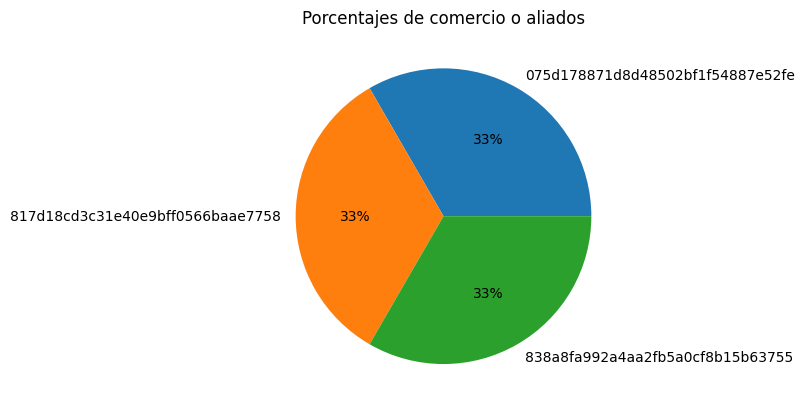

In [28]:
comercios = df.groupby('merchant_id').agg({'merchant_id':'nunique'})
comercios.columns = ['cantidad']
comercios.reset_index(inplace=True)

explode = [0, 0.1, 0, 0, 0]
plt.title('Porcentajes de comercio o aliados')
plt.pie(comercios.cantidad.tolist(), labels=comercios.merchant_id.tolist(), autopct='%.0f%%')

plt.show()

La data esta estrategicamente balanceda, en tres comercios o aliados.

#### Sedes por cada comercio

In [36]:
comercios_sedes = df.groupby('merchant_id').agg({'subsidiary':'nunique'})
comercios_sedes.columns = ['cantidad_sedes']
comercios_sedes['porcentaje_sedes'] = comercios_sedes['cantidad_sedes'] * 100/comercios_sedes['cantidad_sedes'].sum()
comercios_sedes['porcentaje_sedes'] = comercios_sedes['porcentaje_sedes'].round(2)
comercios_sedes.reset_index(inplace=True)
comercios_sedes

,merchant_id,cantidad_sedes,porcentaje_sedes
0,075d178871d8d48502bf1f54887e52fe,4178,26.03
1,817d18cd3c31e40e9bff0566baae7758,5233,32.60
2,838a8fa992a4aa2fb5a0cf8b15b63755,6641,41.37


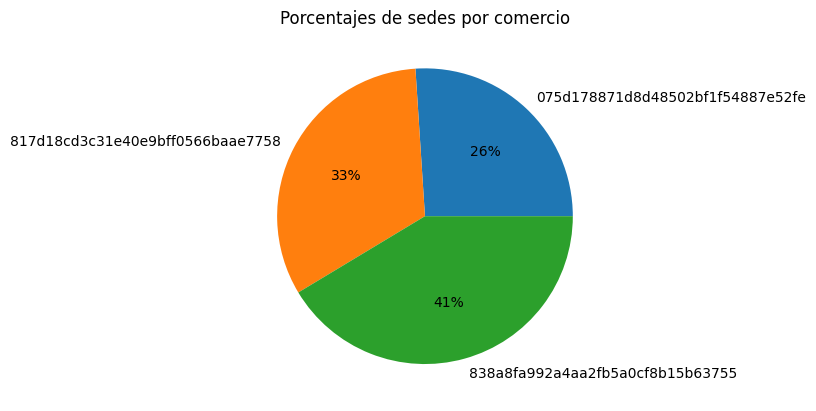

In [38]:
explode = [0, 0.1, 0, 0, 0]
plt.title('Porcentajes de sedes por comercio')
plt.pie(comercios_sedes.cantidad_sedes.tolist(), labels=comercios_sedes.merchant_id.tolist(), autopct='%.0f%%')

plt.show()

Vemos que cada comercio, parcialmente tienen la misma cantida de sedes, siendo el comercio con código 838... el que más sedes posee.

### Cantidad de transaciones por tipo y comercio

In [45]:
cols = ['merchant_id', 'transaction_type']
comercios_tipo_trans = df.groupby(cols).agg({'transaction_type':'count'})
comercios_tipo_trans.columns = ['cantidad']
comercios_tipo_trans.reset_index(inplace=True)
comercios_tipo_trans

,merchant_id,transaction_type,cantidad
0,075d178871d8d48502bf1f54887e52fe,CREDITO,1005806
1,075d178871d8d48502bf1f54887e52fe,DEBITO,608807
2,817d18cd3c31e40e9bff0566baae7758,CREDITO,44318
3,817d18cd3c31e40e9bff0566baae7758,DEBITO,7222782
4,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,1116998
5,838a8fa992a4aa2fb5a0cf8b15b63755,DEBITO,759700


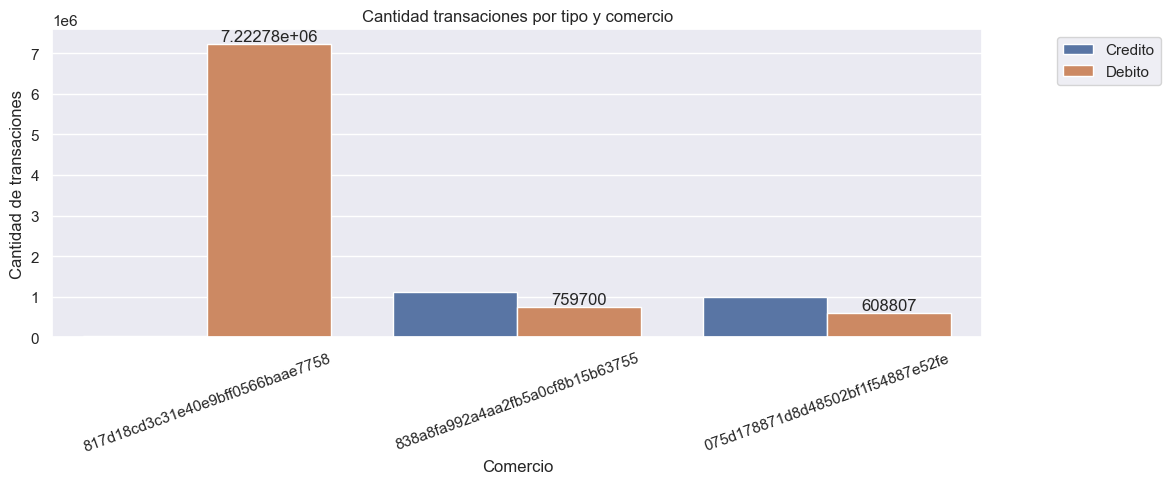

In [46]:
plt.figure(figsize=(12, 4))
sns.set(style='darkgrid')
labels = ['Credito', 'Debito']
fig = sns.countplot(x='merchant_id', hue ='transaction_type', data=df, order = df['merchant_id'].value_counts().index)
fig.bar_label(fig.containers[1], label_type='edge');

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Cantidad transaciones por tipo y comercio')

plt.ylabel('Cantidad de transaciones')
plt.xlabel('Comercio')
plt.xticks(rotation=20)
plt.show()

Se observa que el mayor tipo de transaciones se realizan en el comercio con código que inicia en 81... y estas son de tipo Debito,
Adicional, los tipos de transación estan equilibradamente balancedas en los demás comercios.

#### Cantidad de transaciones o movimientos en cuentas por dia del año

Dada la premisa que las malas practicas transacionales se caracterizan por estar en una misma ventana de 
tiempo que suele ser 24 hora. Asumiremos que esta ventana
que esta ventana representan un día desde las 0h hasta las 23h de un día. Cualquier otro rango que cumpla 24h pero pertenesca a dos días diferentes no se tendra en 
cuenta en nuestro modelo.
s

In [92]:
# transformación de tipo de datos
df.transaction_date = pd.to_datetime(df.transaction_date).dt.date
df.transaction_amount = df.transaction_amount.astype(float)

In [156]:
cols = ['transaction_date', 'transaction_type']
trasaciones_dia = df.groupby(cols, as_index=False).agg({'account_number': 'count'})

In [157]:
trasaciones_dia

,transaction_date,transaction_type,account_number
0,2021-01-01,CREDITO,3385
1,2021-01-01,DEBITO,6107
2,2021-01-02,CREDITO,6777
3,2021-01-02,DEBITO,13960
4,2021-01-03,CREDITO,5539
...,...,...,...
663,2021-11-28,DEBITO,26529
664,2021-11-29,CREDITO,10380
665,2021-11-29,DEBITO,33016
666,2021-11-30,CREDITO,8997


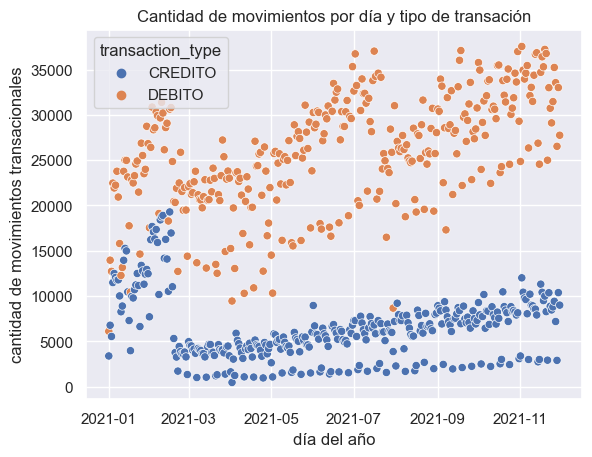

In [160]:
sns.scatterplot(data=trasaciones_dia, x="transaction_date", y="account_number",hue="transaction_type")
plt.ylabel('cantidad de movimientos transacionales')
plt.xlabel('día del año')
plt.title('Cantidad de movimientos por día y tipo de transación');

In [98]:
cols = ['transaction_date', 'transaction_type']
mov_unicos_dia = df.groupby(cols, as_index=False).agg({'account_number': 'nunique'})

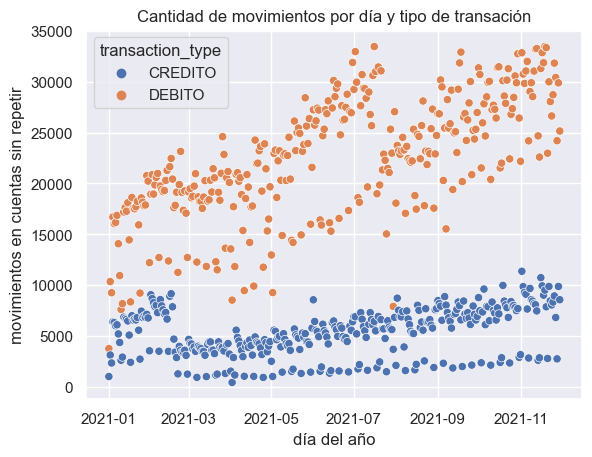

In [162]:
sns.scatterplot(data=mov_unicos_dia, x="transaction_date", y="account_number",hue="transaction_type")
plt.ylabel('movimientos en cuentas sin repetir')
plt.xlabel('día del año')
plt.title('Cantidad de movimientos por día y tipo de transación');

En las dos anteriores gráficas observamos la cantidad de transaciones realizadas en las cuentas presentes en la base de datos por día y tipo de transacción.
Vemos existe una segmentación por el tipo de transacción que evidencia que la cantidad de movimientos son principalmente por debito y a su vez por las graficas
de la sección anterior, estos seran por movimientos transacionales en los comercios que inician por el código 817.

Vemos a su vez, que los tres primeros meses del 2021 es cuando algunas cuentas de tipo credito realizan una mayor cantidad de transacciones.
Si vemos la primera grafica, donde se cuentan duplicidades, estos nos da evidencia intuitiva que hubieron malas practicas por usuarios que poseen cuentas de credito
en los 3 primeros meses del año en analísis.

### Dinero implicado en movimientos en cuentas por dia del año

In [100]:
cols = ['transaction_date', 'transaction_type']
dinero_dia = df.groupby(cols, as_index=False).agg({'transaction_amount': 'sum'})

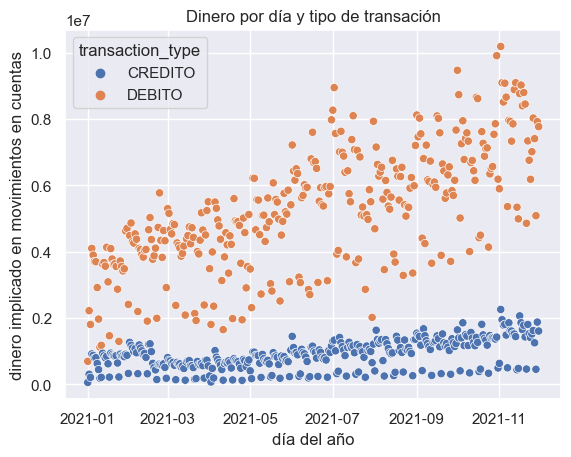

In [165]:
sns.scatterplot(data=dinero_dia, x="transaction_date", y="transaction_amount",hue="transaction_type")
plt.ylabel('dinero implicado en movimientos en cuentas')
plt.xlabel('día del año')
plt.title('Dinero por día y tipo de transación');

La gráfica nos indica que efectivamente las transaciones por tipo debito mueven una mayor cantidad de dinero.

## Modelo Heurísitico

La idea a continuación es buscar de valores anómalos en el comportamiento de transacciones que usurios realizan con sus cuenta, cuando la cantidad o movimientos en las cuentas
de un usuario y el dinero involucrado en todos los movimientos es superor al percentil 99 de cada una de estas métricas.

### ¿Cuántos movimientos por día un usuario realiza en sus cuentas, indepente del comercio y la sede?

In [174]:
cols =['user_id', 'transaction_date']
agg = {'account_number': 'count', 'transaction_amount': sum}
mov_user = df.groupby(cols, as_index=False).agg(agg)
mov_user

,user_id,transaction_date,account_number,transaction_amount
0,000002373d5835d0e53b78722424076f,2021-01-26,1,29.722275
1,000002373d5835d0e53b78722424076f,2021-02-23,1,71.333460
2,000002373d5835d0e53b78722424076f,2021-04-15,1,23.777820
3,000004f4a6f3ac93f454a5dc04b2a252,2021-03-10,1,594.445501
4,000004f4a6f3ac93f454a5dc04b2a252,2021-11-05,1,178.333650
...,...,...,...,...
9214415,ffffed6a586baff30e8cd9f18a73290e,2021-06-18,1,118.889100
9214416,ffffed6a586baff30e8cd9f18a73290e,2021-08-28,1,261.556021
9214417,ffffed6a586baff30e8cd9f18a73290e,2021-09-03,1,237.778200
9214418,ffffed6a586baff30e8cd9f18a73290e,2021-10-09,1,416.111851


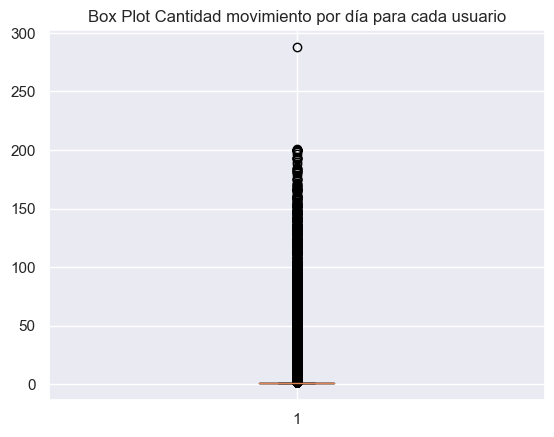

In [175]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot Cantidad movimiento por día para cada usuario')
ax1.boxplot(mov_user.account_number);


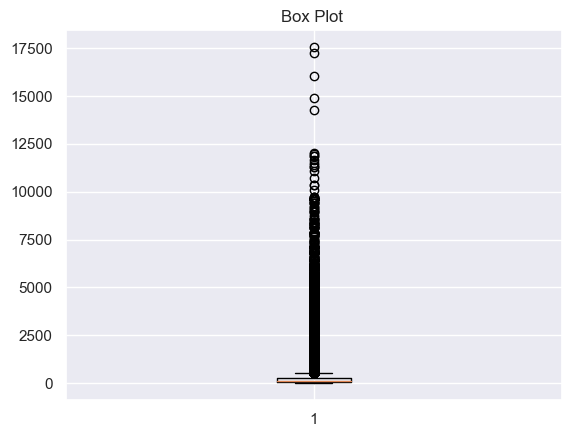

In [176]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot ')
ax1.boxplot(mov_user.transaction_amount);

In [177]:
mov_user.describe()

,account_number,transaction_amount
count,9.214420e+06,9.214420e+06
mean,1.167562e+00,2.234684e+02
std,1.625027e+00,3.304602e+02
min,1.000000e+00,5.944455e+00
25%,1.000000e+00,4.755564e+01
50%,1.000000e+00,1.188891e+02
75%,1.000000e+00,2.425338e+02
max,2.880000e+02,1.755920e+04


In [178]:
percen_99_cant_mov = np.percentile(mov_user.account_number, 99)
mov_sup_99 = mov_user[mov_user.account_number > percen_99_cant_mov]
mov_sup_99.user_id.nunique()

36836

In [179]:
percen_99_tras_mov = np.percentile(mov_user.transaction_amount, 99)
tran_sup_99 = mov_user[mov_user.transaction_amount > percen_99_tras_mov]
tran_sup_99.user_id.nunique()

56424

Existen 36836 usuarios que han realizado una cantidad de movimientos que son superior al percentil 99 de los movimientos por día que hacen los
usuarios en la base de datos. Adicional, vemos que el comportamiento normal: cantidad de movimientos por día en las cuentas asociadas a un usuario es de 1 movimiento
mediana. Estos usuarios, en primera aproximación estarian teniendo una mala practica transacional, con respecto a manejo que le dan los usuarios presentes
en la base de datos.
A su vez, existen 56424 usuarios donde la cantidad de dinero involucrado en sus transaciones estan por encima del percentil 99 de esta cantidad.

Ahora encontremos a los usuarios que se encuentran sobre el percentil 99 en cantidad de movimientos y dinero asociado en estas transferencias.

In [180]:
mov_sup_99.sort_values('account_number', inplace=True)
mov_sup_99

C:\Users\Asus\AppData\Local\Temp\ipykernel_15024\742882560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_sup_99.sort_values('account_number', inplace=True)


,user_id,transaction_date,account_number,transaction_amount
250,0002ad97e3f83b08a57f8fb018e747fb,2021-11-09,4,2258.892905
5507225,9919468908bc7c53aacad34ee1dab8ee,2021-02-22,4,31.624501
5507297,991a4d15a5501b3f2233c9cdf727c0b2,2021-02-01,4,2377.782005
5507301,991a4d15a5501b3f2233c9cdf727c0b2,2021-02-24,4,2377.782005
5507932,991f29e53cd2a52f7da40eab1c861f96,2021-02-02,4,2853.338406
...,...,...,...,...
3743651,684202021037f203f2f2258f5f1819a4,2021-01-20,200,1192.996242
8985883,f9a10e0f56a96d244feadda0194fcb06,2021-02-02,200,1188.891002
3391273,5e674596af22a66e826bf15b2a363cce,2021-01-27,200,2830.838643
8161081,e2d6158cc2b6467a47223cb2629f03f3,2021-02-02,201,1347.248906


In [135]:
mov_sup_99.sort_values('account_number', inplace=True)
mov_sup_99.drop_duplicates('user_id', keep='last', inplace=True)

mov_sup_99.sort_values('transaction_amount', inplace=True)
tran_sup_99.drop_duplicates('user_id',  keep='last', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15024\4055553247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_sup_99.sort_values('account_number', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15024\4055553247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_sup_99.drop_duplicates('user_id', keep='last', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15024\4055553247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [181]:
casos_anomalos = pd.merge(
    mov_sup_99[['transaction_date', 'user_id', 'account_number']],
    tran_sup_99[['transaction_date', 'user_id', 'transaction_amount']], 
    on=['user_id', 'transaction_date'], how='inner')
casos_anomalos

,transaction_date,user_id,account_number,transaction_amount
0,2021-11-09,0002ad97e3f83b08a57f8fb018e747fb,4,2258.892905
1,2021-02-01,991a4d15a5501b3f2233c9cdf727c0b2,4,2377.782005
2,2021-02-24,991a4d15a5501b3f2233c9cdf727c0b2,4,2377.782005
3,2021-02-02,991f29e53cd2a52f7da40eab1c861f96,4,2853.338406
4,2021-04-30,991f29e53cd2a52f7da40eab1c861f96,4,2853.338406
...,...,...,...,...
23041,2021-01-17,e77fc30bb3bec8bf45a35b535b292047,200,2634.174671
23042,2021-02-10,ab2b8b5244e19c302a09d825a15d1193,200,1959.232926
23043,2021-02-07,5e674596af22a66e826bf15b2a363cce,200,2537.023254
23044,2021-01-27,5e674596af22a66e826bf15b2a363cce,200,2830.838643


En el anterior dataset hemos encontrado los usuarios y las fechas en las que han realizado una cantidad de transaciones con un cantidad de dinero
que esta por encima del percentil 99 con respeto a toda la data en la base de datos.

En este caso hemos encontrado o realizado un primer acercamiento en encontrar aquellos usuarios en un día han realizado una practica anomala
con respecto al comportamiento normal del conjunto de datos.

La idea ahora es poder encontrar mediante un mejor modelo este conjunto de usuarios que de manera heuristica se obtuvieron a partir de un analísis de percentiles de nos indica un comportamiento por fuera de la normalidad del conjunto de datos.

## Modelo de aprendizaje no supervisado, clustering por medio de Knn

En nuestra exploración de datos vimos que existen 3 comercios donde uno de ellos posee la mayor cantidad de transaciones por tipo debito, y que la cantidad de movimientos
o transaciones y el dinero involucrado en la cuenta de un usuario son variables importante para la lógica de negocio. Es por tanto que tomaremos estas
variable y buscaremos si existe algunas agrupaciones ocultas en los datos que nos permitan clasificar cada registro y función de las carateristicas generales 
de un grupo.

In [143]:
cols =['user_id','merchant_id', 'transaction_type', 'transaction_date']
agg = {'account_number': 'count', 'transaction_amount': sum}
data = df.groupby(cols, as_index=False).agg(agg)
data['dia'] = data.transaction_date - data.transaction_date.min()
data['dia'] = data['dia'].apply(lambda x: x.days)

In [144]:
data

,user_id,merchant_id,transaction_type,transaction_date,account_number,transaction_amount,dia
0,000002373d5835d0e53b78722424076f,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-01-26,1,29.722275,25
1,000002373d5835d0e53b78722424076f,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-02-23,1,71.333460,53
2,000002373d5835d0e53b78722424076f,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-04-15,1,23.777820,104
3,000004f4a6f3ac93f454a5dc04b2a252,075d178871d8d48502bf1f54887e52fe,CREDITO,2021-03-10,1,594.445501,68
4,000004f4a6f3ac93f454a5dc04b2a252,817d18cd3c31e40e9bff0566baae7758,DEBITO,2021-11-05,1,178.333650,308
...,...,...,...,...,...,...,...
9302845,ffffed6a586baff30e8cd9f18a73290e,817d18cd3c31e40e9bff0566baae7758,DEBITO,2021-06-18,1,118.889100,168
9302846,ffffed6a586baff30e8cd9f18a73290e,817d18cd3c31e40e9bff0566baae7758,DEBITO,2021-08-28,1,261.556021,239
9302847,ffffed6a586baff30e8cd9f18a73290e,817d18cd3c31e40e9bff0566baae7758,DEBITO,2021-09-03,1,237.778200,245
9302848,ffffed6a586baff30e8cd9f18a73290e,817d18cd3c31e40e9bff0566baae7758,DEBITO,2021-10-09,1,416.111851,281


In [145]:
X_model = data.loc[:,['merchant_id', 'transaction_type', 'account_number', 'transaction_amount', 'dia']]

In [147]:
X_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302850 entries, 0 to 9302849
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   merchant_id         object 
 1   transaction_type    object 
 2   account_number      int64  
 3   transaction_amount  float64
 4   dia                 int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 354.9+ MB


In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


def prepocesar_data(X: pd.DataFrame) -> pd.DataFrame:
    """Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
        columnas cualitativas. Para mantener las columnas a las que no se les aplica
        ninguna transformación se tiene que indicar remainder='passthrough'.

    Args:
        X: data que ha pasado los filtros de limpieza.

    Return:
        Data preposeceda lista para generar modelos
    """

    numeric_cols = X.select_dtypes(include=["int64", "int", 'float64']).columns.to_list()
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.to_list()
    preprocessor = ColumnTransformer(
        [
            ("scale", StandardScaler(), numeric_cols),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols),
        ],
        remainder="passthrough",
    )

    X_prep = preprocessor.fit_transform(X)
    # Convertir el output en dataframe y añadir el nombre de las columnas
    encoded_cat = preprocessor.named_transformers_["onehot"].get_feature_names_out(
        cat_cols
    )
    labels = np.concatenate([numeric_cols, encoded_cat])
    datos_prep = pd.DataFrame(X_prep, columns=labels)

    return datos_prep

In [149]:
X_model_pre = prepocesar_data(X_model)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [150]:
X_model_pre

,account_number,transaction_amount,dia,merchant_id_075d178871d8d48502bf1f54887e52fe,merchant_id_817d18cd3c31e40e9bff0566baae7758,merchant_id_838a8fa992a4aa2fb5a0cf8b15b63755,transaction_type_CREDITO,transaction_type_DEBITO
0,-0.107015,-0.594895,-1.660943,0.0,0.0,1.0,1.0,0.0
1,-0.107015,-0.465712,-1.367994,0.0,0.0,1.0,1.0,0.0
2,-0.107015,-0.613350,-0.834407,0.0,0.0,1.0,1.0,0.0
3,-0.107015,1.158302,-1.211056,1.0,0.0,0.0,1.0,0.0
4,-0.107015,-0.133527,1.299939,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9302845,-0.107015,-0.318074,-0.164808,0.0,1.0,0.0,0.0,1.0
9302846,-0.107015,0.124839,0.578028,0.0,1.0,0.0,0.0,1.0
9302847,-0.107015,0.051020,0.640803,0.0,1.0,0.0,0.0,1.0
9302848,-0.107015,0.604661,1.017452,0.0,1.0,0.0,0.0,1.0


In [151]:
from sklearn.cluster import KMeans

#### Método del codo para obtener la cantidad de grupos ideal, donde la inercia se estabiliza

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

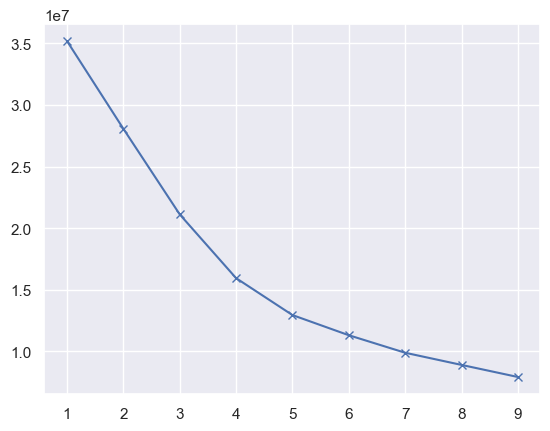

In [152]:
scores = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_model_pre)
    scores.append(kmeans.inertia_)

plt.plot(range(1, 10), scores, 'bx-')
plt.show()


Vemos que 4 son la cantidad de grupos ideal que contiene el conjunto de datos en análisis

In [153]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_model_pre)
labels = kmeans.labels_

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [183]:
grupos = pd.DataFrame({'labels':labels})
data = pd.concat([data, grupos], axis=1)
data.labels.value_counts()

labels
2    4819111
0    4058631
1     420465
3       4643
Name: count, dtype: int64

In [189]:
data[data.labels==3]

,user_id,merchant_id,transaction_type,transaction_date,account_number,transaction_amount,dia,labels
10007,004a63b9c469d2bfc7e3ce29c3edd462,838a8fa992a4aa2fb5a0cf8b15b63755,DEBITO,2021-02-10,40,242.533764,40,3
25893,00bcf49e64276b903e529ee58fb6bcd6,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-02-11,68,432.756325,41,3
25894,00bcf49e64276b903e529ee58fb6bcd6,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-02-12,32,203.300361,42,3
26293,00bf77a52b635dd43c01384fa5e97346,838a8fa992a4aa2fb5a0cf8b15b63755,DEBITO,2021-01-24,78,463.667491,23,3
27265,00c67e61a803dc89bf5894b07d101d7f,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-01-14,35,208.118937,13,3
...,...,...,...,...,...,...,...,...
9296434,ffd25fce0151b5b923c684aa5c8171a4,838a8fa992a4aa2fb5a0cf8b15b63755,CREDITO,2021-02-15,100,746.623549,45,3
9296435,ffd25fce0151b5b923c684aa5c8171a4,838a8fa992a4aa2fb5a0cf8b15b63755,DEBITO,2021-02-08,59,350.722846,38,3
9296436,ffd25fce0151b5b923c684aa5c8171a4,838a8fa992a4aa2fb5a0cf8b15b63755,DEBITO,2021-02-09,41,243.722655,39,3
9296438,ffd25fce0151b5b923c684aa5c8171a4,838a8fa992a4aa2fb5a0cf8b15b63755,DEBITO,2021-02-16,77,588.501046,46,3


Vemos que la clase nombrada como 3 es la que posee valores más altos en cantidad de movimientos transacionales y su dinero asociado,
por tanto es un buen indicio pensar que esta clase nos habla de los usuarios que han realizado malas practicas transacionales.